# Springboard Data Science Career Track Unit 4 Challenge 


## Objectives

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… [well, there are 32 boroughs within Greater London](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## The Data Science Pipeline
Data Science is magical. In this case study, we will apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
- Stage 1. Sourcing and loading 
- Stage 2. Cleaning, transforming, and visualizing 
- Stage 3. Modeling 
- Stage 4. Evaluating and concluding 

### Stage 1. Sourcing and Loading 

Lets importing  ***pandas***.  [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

#### 1.1. Importing Libraries

In [133]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt 

#### 1.2.  Loading the data


Our data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal with a massive range of London-oriented datasets.

In [134]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### Stage 2. Cleaning, transforming, and visualizing 
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

#### 2.1. Exploring the data

In [135]:
# First off, let's use .shape feature of pandas DataFrames to look at the number of rows and columns. 
properties.shape

(320, 49)

In [136]:
# Using the .head() method, let's check out the state of our dataset.  
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


We've got the data, but it doesn't look tidy. At this stage, we would struggle to perform analysis on it. 

Best practice is for pandas DataFrames to contain the **observations of interest** as rows, and the features of those observations as columns. We want **tidy** DataFrames: whose rows are observations and whose columns are variables.

###  2.2. Cleaning the data (Part 1)
 The first operation we want to do on the dataset is called **transposition**. You *transpose* a table when you flip the columns into rows, and *vice versa*. 

If you transpose this DataFrame then the borough names will become the row indices, and the date time objects will become the column headers.


Each pandas DataFrame already has the *.T* attribute which is the transposed version of that DataFrame.

Assign the transposed version of the original to a new variable. Let’s call it *properties_T*. 

In [137]:
properties_T = properties.T

In [138]:
# Let's check the head of our new Transposed DataFrame. 
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,836807,769392,801999,758223,726755,716135,760052,776621,801233,705091
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,304852,305012,309560,312407,315580,312628,313598,312605,318517,322949
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,530354,528816,532528,537359,536018,537927,530345,533994,543215,536926
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,345405,346253,352261,355869,359059,361700,362289,360495,362509,366710


Now, the row indices of our DataFrame contain the names of the boroughs. 

We should never have a piece of information we want to analyze as an index, this information should be within the DataFrame itself. The indices should just be a unique ID, almost always a number.

In [139]:
# To confirm what our row indices are, let's call the .index variable on our properties_T DataFrame. 
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [140]:
# Call the .reset_index() method on properties_T to reset the indices, and the reassign the result to properties_T: 
properties_T = properties_T.reset_index()

In [141]:
# Now let's check out our DataFrames indices: 
properties_T.index

RangeIndex(start=0, stop=49, step=1)

 The indicies are now a numerical RangeIndex, exactly what we want. 

**Note**: if we call the reset_index() line more than once, we'll get an error because a whole extra level of row indices will have been inserted! 

In [142]:
# Call the head() function again on properties_T to check out the new row indices: 
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,310,311,312,313,314,315,316,317,318,319
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,836807,769392,801999,758223,726755,716135,760052,776621,801233,705091
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304852,305012,309560,312407,315580,312628,313598,312605,318517,322949
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,530354,528816,532528,537359,536018,537927,530345,533994,543215,536926
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,345405,346253,352261,355869,359059,361700,362289,360495,362509,366710


Our column headings are mainly just integers. The first one is the string 'index' and the rest are integers ranging from 0 to 319, inclusive.

For the ultimate aim of having a *tidy* DataFrame, we'll turn the datetimes found along the first row (at index 0) into the column headings.  

The resulting DataFrame will have boroughs as rows, the columns as dates (each representing a particular month), and the cell-values as the average property value sold in that borough for that month. 

In [143]:
# To confirm that our DataFrame's columns are mainly just integers, call the .columns feature on our DataFrame:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           310,     311,     312,     313,     314,     315,     316,     317,
           318,     319],
      dtype='object', length=321)

To confirm that the first row contains the proper values for column headings, use the  ***iloc[] method*** on our *properties_T* DataFrame. Use index 0. Recall that if you use single square brackets, we'll return a series. If you use double square brackets, a DataFrame is returned.

In [144]:
# Call the iloc[] method with double square brackets on the properties_T DataFrame, to see the row at index 0. 
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,310,311,312,313,314,315,316,317,318,319
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00


**Notice that these values are all the months from January 1995 to July 2021, inclusive**. We can reassign the columns of our DataFrame the values within this row at index 0 by making use of the *.columns* feature.

In [145]:
# Try this now. 
properties_T.columns = properties_T.iloc[0]

In [146]:
# Check out our DataFrame again: 
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,836807,769392,801999,758223,726755,716135,760052,776621,801233,705091
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304852,305012,309560,312407,315580,312628,313598,312605,318517,322949
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,530354,528816,532528,537359,536018,537927,530345,533994,543215,536926
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,345405,346253,352261,355869,359059,361700,362289,360495,362509,366710


We need to drop the row at index 0! 

Reassign *properties_T* with the return value of calling the DataFrame ***drop()*** method, passing 0 as the index.

In [147]:
# Have a go at this now. 
properties_T = properties_T.drop(0)

In [148]:
# Now check out our DataFrame again to see how it looks. 
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,836807,769392,801999,758223,726755,716135,760052,776621,801233,705091
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304852,305012,309560,312407,315580,312628,313598,312605,318517,322949
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,530354,528816,532528,537359,536018,537927,530345,533994,543215,536926
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,345405,346253,352261,355869,359059,361700,362289,360495,362509,366710
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,522239,513101,495067,511212,512929,518125,501308,506219,516633,535095


**Each column now represents a month and year, and each cell-value represents the average price of houses sold in borough of the corresponding row**. 

#### 2.3. Cleaning the data (Part 2)
We can see from the *.head()* list call that we need to rename some columns. 

'Unnamed: 0' should be something like 'London Borough' and 'NaN' should  be changed. 

Call the **rename()** method on *properties_T* and set the *columns* keyword equal to the following dictionary: 
{'Unnamed: 0':'London_Borough', pd.NaT: 'ID'} 
, then reassign that value to properties_T to update the DataFrame.

In [149]:
# Try this here. 
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [150]:
# Let's check out the DataFrame again to admire our good work. 
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,836807,769392,801999,758223,726755,716135,760052,776621,801233,705091
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,304852,305012,309560,312407,315580,312628,313598,312605,318517,322949
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,530354,528816,532528,537359,536018,537927,530345,533994,543215,536926
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,345405,346253,352261,355869,359059,361700,362289,360495,362509,366710
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,522239,513101,495067,511212,512929,518125,501308,506219,516633,535095


Lets find out exactly how many by calling ***.columns*** on our DataFrame.  

In [151]:
# Try this here. 
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2020-10-01 00:00:00, 2020-11-01 00:00:00, 2020-12-01 00:00:00,
       2021-01-01 00:00:00, 2021-02-01 00:00:00, 2021-03-01 00:00:00,
       2021-04-01 00:00:00, 2021-05-01 00:00:00, 2021-06-01 00:00:00,
       2021-07-01 00:00:00],
      dtype='object', name=0, length=321)

#### 2.4. Transforming the data
Our data would be tidier if you had fewer columns. 

Wouldn't a ***single*** column for time be better than nearly 300? This single column will contain all of the datetimes in your current column headings. 

**Remember** the two most important properties of tidy data are:
1. **Each column is a variable.**

2. **Each row is an observation.**

One of the miraculous things about pandas is ***melt()***, which enables us to melt those values along the column headings of our current DataFrame into a single column.  

Make a new DataFrame called clean_properties, and assign it the return value of ***pd.melt()*** with the parameters: *properties_T* and *id_vars = ['Borough', 'ID']*. 

The result will be a DataFrame with rows representing the average house price within a given month and a given borough. Exactly what you want. 

In [152]:
# Try this here: 
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])

In [153]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Rename the '0' column 'Month', and the 'value' column 'Average_price'. 

Use the ***rename()*** method, and reassign *clean_properties* with the result. 

In [154]:
# Re-name the column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [155]:
# Check out the DataFrame: 
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


We need to check out the data types of your clean_properties DataFrame, just in case we need to do any type conversions. 

In [156]:
# Let's use the .dtypes attribute to check the data types of our clean_properties DataFrame:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

Change the Average_price column to a numeric type, specifically, a float.

Call the ***to_numeric()*** method on *pd*, pass the 'Average_price' column into its brackets, and reassign the result to the *clean_properties* 'Average_price' column.

In [157]:
# Try this here
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [158]:
# Check out the new data types:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [159]:
# To see if there are any missing values, we should call the count() method on our DataFrame:
clean_properties.count()

London_Borough    15312
ID                14355
Month             15312
Average_price     14355
dtype: int64

#### 2.5. Cleaning the data (Part 3) 
Since there are only 32 London boroughs, check out the unique values of the 'London_Borough' column to see if they're all there.

Call the ***unique()*** method on the London_Borough column. 

In [160]:
 clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

Some of these strings are not London boroughs.  

The strings that don't belong:
- 'Unnamed: 34'
- 'Unnamed: 37'
- 'NORTH EAST'
- 'NORTH WEST'
- 'YORKS & THE HUMBER' 
- 'EAST MIDLANDS'
- 'WEST MIDLANDS'
- 'EAST OF ENGLAND'
- 'LONDON' 
- 'SOUTH EAST' 
- 'SOUTH WEST'
- 'Unnamed: 47' 
- 'England'

See what information is contained in rows where London_Boroughs is 'Unnamed’ and, if there’s nothing valuable, we can drop them.  To investigate, subset the clean_properties DataFrame on this condition.

In [161]:
# Subset clean_properties on the condition: df['London_Borough'] == 'Unnamed: 34' to see what information these rows contain. 
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [162]:
# Let's do the same for 'Unnamed: 37':
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


These rows don't contain any valuable information. Delete them.


In [163]:
# Let's look at how many rows have NAs as their value for ID. 
# To this end, subset clean_properties on the condition: clean_properties['ID'].isna().
# Notice that this line doesn't actually reassign a new value to clean_properties. 
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
15252,Unnamed: 37,NaN,2021-06-01,NaN
15262,Unnamed: 47,NaN,2021-06-01,NaN
15297,Unnamed: 34,NaN,2021-07-01,NaN
15300,Unnamed: 37,NaN,2021-07-01,NaN


We always have a ***choice*** about how to deal with Null (NaN) values. We show you two methods today:
1. filtering on ***notna()***
2. reassigning on ***dropna()***

Try ***notna()*** first.  ***notna()*** will return a series of booleans, where the value will be true if there's a not a null and false if there is a null.

Make a new variable called *NaNFreeDF1* and assign it the result of filtering *clean_properties* on the condition: *clean_properties['Average_price'].notna()*

In [164]:
# Try your hand at method (1) here: 
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [165]:
# If we do a count on our new DataFrame, we'll see how many rows we have that have complete information: 
NaNFreeDF1.count()

London_Borough    14355
ID                14355
Month             14355
Average_price     14355
dtype: int64

For completeness, now use ***dropna()***. ***dropna()*** will drop all null values. 

Make a new variable called *NaNFreeDF2*, and assign it the result of calling ***dropna()*** on *clean_properties*. 

In [166]:
# filtering the data with NaN values
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [167]:
# Let's do a count on this DataFrame object: 
NaNFreeDF2.count()

London_Borough    14355
ID                14355
Month             14355
Average_price     14355
dtype: int64

In [168]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

Both these methods did the job! Thus, we can pick either resultant DataFrame.

In [169]:
# Using the .shape attribute, compare the dimenions of clean_properties, NaNFreeDF1, and NaNFreeDF2: 
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(15312, 4)
(14355, 4)
(14355, 4)


Lets pick NaNFreeDF2.

Drop the rest of the invalid 'London Borough' values.

An elegant way to do this is to make a list of all those invalid values, then use the isin() method, combined with the negation operator ~, to remove those values. Call this list nonBoroughs.

In [170]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

Filter *NanFreeDF2* first on the condition that the rows' values for *London_Borough* is *in* the *nonBoroughs* list. 

In [171]:
# Do this here. 
NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
15306,EAST OF ENGLAND,E12000006,2021-07-01,312075.61420
15307,LONDON,E12000007,2021-07-01,494672.63620
15308,SOUTH EAST,E12000008,2021-07-01,354278.34990
15309,SOUTH WEST,E12000009,2021-07-01,277177.84280


We can now just put the negation operator *~* before the filter statement to get just those rows whose values for *London_Borough* is **not** in the *nonBoroughs* list:

In [172]:
NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
15292,Sutton,E09000029,2021-07-01,401331.48750
15293,Tower Hamlets,E09000030,2021-07-01,496344.45050
15294,Waltham Forest,E09000031,2021-07-01,490727.68840
15295,Wandsworth,E09000032,2021-07-01,600529.70270


Then execute the reassignment: 



In [173]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

In [174]:
NaNFreeDF2.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Make a new variable called 'df'

In [175]:
# Do that here. 
df = NaNFreeDF2

In [176]:
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [177]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

#### 2.6. Visualizing the data
Lets get a visual idea of the price shift occurring in the London boroughs. 

We are restricting our observations to Camden for now. 

How have housing prices changed since 1995?

Text(0, 0.5, 'Price')

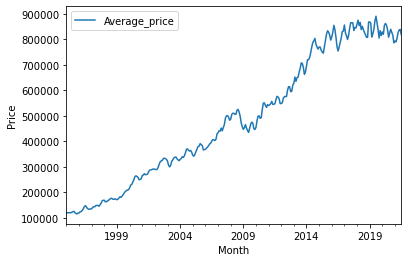

In [178]:
# First of all, make a variable called camden_prices, and assign it the result of filtering df on the following condition:
# df['London_Borough'] == 'Camden'
camden_prices = df[df['London_Borough'] == 'Camden']

# Make a variable called ax. Assign it the result of calling the plot() method, and plugging in the following values as parameters:
# kind ='line', x = 'Month', y='Average_price'
ax = camden_prices.plot(kind ='line', x = 'Month', y='Average_price')

# Finally, call the set_ylabel() method on ax, and set that label to the string: 'Price'. 
ax.set_ylabel('Price')

To limit the amount of temporal data-points you have, it would be useful to extract the year from every value in our *Month* column. 300 is more datapoints than you need.

To this end, you'll apply a ***lambda function***. The logic works as follows. You'll:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column

In [179]:
# Try this yourself. 
df['Year'] = df['Month'].apply(lambda t: t.year)

# Call the tail() method on df
df.tail()

,London_Borough,ID,Month,Average_price,Year
15292,Sutton,E09000029,2021-07-01,401331.4875,2021
15293,Tower Hamlets,E09000030,2021-07-01,496344.4505,2021
15294,Waltham Forest,E09000031,2021-07-01,490727.6884,2021
15295,Wandsworth,E09000032,2021-07-01,600529.7027,2021
15296,Westminster,E09000033,2021-07-01,898010.8822,2021


To calculate the mean house price for each year, you first need to **group by** the London_Borough and Year columns.

Make a new variable called *dfg*, and assign it the result of calling the ***groupby()*** method on *df*. Plug in the parameters: by=['Borough', 'Year']. To get the ***mean()*** of the result you'll chain that onto the end. 

We've helped you with this line, it's a little tricky. 

In [180]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now indices
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

Average_price
London_Borough       Year               
Kingston upon Thames 2006  264667.037392
Greenwich            2004  186893.592725
Bexley               2015  274209.280967
Lambeth              2011  304029.857950
Camden               1998  170688.973933
                     2005  368345.084125
Ealing               1999  126278.342342
Barking & Dagenham   2012  165863.911600
Haringey             2004  236265.141883
Havering             2002  149065.935742

In [181]:
# Let's reset the index for our new DataFrame dfg, and call the head() method on it. 
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


### 3. Modelling
We want to create a function that will calculate a ratio of house prices, that compares the price of a house in 2020 to the price in 1998. 

Call this function create_price_ratio. 

We want this function to:

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: **dfg[dfg['London_Borough']=='Camden']**. 

2. Get the Average Price for that borough for 1998 and, seperately, for 2020. 

3. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2020. 

4. Return that ratio. 

Once you've written this function, you'll use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2020.

In [182]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2020 = float(d['Average_price'][d['Year']==2020])
    ratio = [y2020/y1998]
    return ratio


In [183]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[5.011842782081041]

In [184]:
# We want to do this for all of the London Boroughs. 
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique London_Borough.
final = {}

In [185]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London_Borough' column of our DataFrame dfg.
# Call the iterator variable 'b'. 
for b in dfg['London_Borough'].unique():
    # Let's make our parameter to our create_price_ratio function: i.e., we subset dfg on 'London_Borough' == b. 
    borough = dfg[dfg['London_Borough'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [5.011842782081041], 'Barnet': [4.297012987231739], 'Bexley': [4.254449314047457], 'Brent': [4.825095166945357], 'Bromley': [4.014905339800167], 'Camden': [4.861844431483058], 'City of London': [5.602705957002757], 'Croydon': [4.254269509250213], 'Ealing': [4.307667261997533], 'Enfield': [4.256596001056549], 'Greenwich': [4.849533253136035], 'Hackney': [6.626818041231246], 'Hammersmith & Fulham': [4.154449461408884], 'Haringey': [5.209957996766157], 'Harrow': [3.949748428339139], 'Havering': [4.326523487437364], 'Hillingdon': [4.195742894566994], 'Hounslow': [4.113328418329147], 'Islington': [4.940509575508868], 'Kensington & Chelsea': [4.942658446849734], 'Kingston upon Thames': [4.212365994827492], 'Lambeth': [5.119651919494619], 'Lewisham': [5.598505984990067], 'Merton': [4.848100485197829], 'Newham': [5.4887807057037845], 'Redbridge': [4.478581714052821], 'Richmond upon Thames': [4.178704097175895], 'Southwark': [5.589066774316124], 'Sutton': [4.1071455652059

Now you have a dictionary with data about the ratio of average prices for each borough between 1998 and 2020,  but you can make it prettier by converting it to a DataFrame. 

In [186]:
# Make a variable called df_ratios, and assign it the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

In [187]:
# Call the head() method on this variable to check it out. 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,5.011843,4.297013,4.254449,4.825095,4.014905,4.861844,5.602706,4.25427,4.307667,4.256596,...,4.8481,5.488781,4.478582,4.178704,5.589067,4.107146,4.812318,5.955895,4.877014,5.040988


In [188]:
# All we need to do now is transpose it, and reset the index! 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,5.011843
1,Barnet,4.297013
2,Bexley,4.254449
3,Brent,4.825095
4,Bromley,4.014905


In [189]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2020'.
df_ratios.rename(columns={'index':'Borough', 0:'2020'}, inplace=True)
df_ratios.head()

,Borough,2020
0,Barking & Dagenham,5.011843
1,Barnet,4.297013
2,Bexley,4.254449
3,Brent,4.825095
4,Bromley,4.014905


In [190]:
# Let's sort in descending order and select the top 15 boroughs.
# Make a variable called top15, and assign it the result of calling sort_values() on df_ratios. 
top15 = df_ratios.sort_values(by='2020',ascending=False).head(15)
print(top15)

                 Borough      2020
11               Hackney  6.626818
30        Waltham Forest  5.955895
6         City of London  5.602706
22              Lewisham  5.598506
27             Southwark  5.589067
24                Newham  5.488781
13              Haringey  5.209958
21               Lambeth  5.119652
32           Westminster  5.040988
0     Barking & Dagenham  5.011843
19  Kensington & Chelsea  4.942658
18             Islington  4.940510
31            Wandsworth  4.877014
5                 Camden  4.861844
10             Greenwich  4.849533


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'City of London'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Southwark'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Lambeth'),
 Text(8, 0, 'Westminster'),
 Text(9, 0, 'Barking & Dagenham'),
 Text(10, 0, 'Kensington & Chelsea'),
 Text(11, 0, 'Islington'),
 Text(12, 0, 'Wandsworth'),
 Text(13, 0, 'Camden'),
 Text(14, 0, 'Greenwich')]

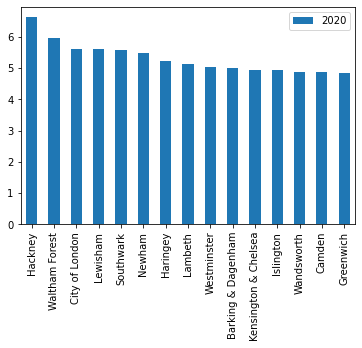

In [191]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2020', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2020']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

### 4. Conclusion
From the above analysis we can conclude that 'Hackney' borough of London has seen the greatest increase in housing prices, on average!